In [1]:
from utils import *
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import time
import os
from tensorflow.keras.models import load_model

In [2]:
model = load_model('cnn50.h5')

In [3]:
def detect_points(face_img):
    me  = np.array(face_img)/255
    x_test = np.expand_dims(me, axis=0)
    x_test = np.expand_dims(x_test, axis=3)

    y_test = model.predict(x_test)
    label_points = (np.squeeze(y_test)*48)+48 
    
    return label_points

In [4]:
face_cascade = cv2.CascadeClassifier('C:/Users/elbar/data/haarcascades/haarcascade_frontalface_default.xml')
dimensions = (96, 96)

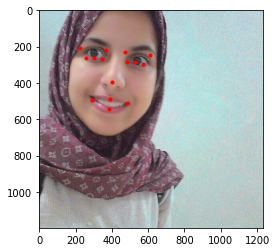

In [9]:
img = cv2.imread('img.jpg')
default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
faces_img = np.copy(gray_img)
plt.rcParams["axes.grid"] = False

all_x_cords = []
all_y_cords = []

for i, (x,y,w,h) in enumerate(faces):
    
    h += 10
    w += 10
    x -= 5
    y -= 5
    
    just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
    cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)
    
    scale_val_x = w/96
    scale_val_y = h/96
    
    label_point = detect_points(just_face)
    all_x_cords.append((label_point[::2]*scale_val_x)+x)
    all_y_cords.append((label_point[1::2]*scale_val_y)+y)
    
plt.imshow(default_img)    
plt.plot(all_x_cords, all_y_cords, 'ro',  markersize=3)
plt.show()

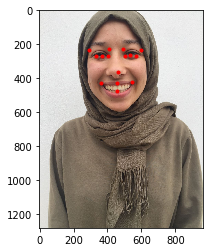

In [25]:
img = cv2.imread('3.jpg')
default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
faces_img = np.copy(gray_img)
plt.rcParams["axes.grid"] = False

all_x_cords = []
all_y_cords = []

for i, (x,y,w,h) in enumerate(faces):
    
    h += 10
    w += 10
    x -= 5
    y -= 5
    
    just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
    cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)
    
    scale_val_x = w/96
    scale_val_y = h/96
    
    label_point = detect_points(just_face)
    all_x_cords.append((label_point[::2]*scale_val_x)+x)
    all_y_cords.append((label_point[1::2]*scale_val_y)+y)
    
plt.imshow(default_img)    
plt.plot(all_x_cords, all_y_cords, 'ro',  markersize=3)
plt.show()

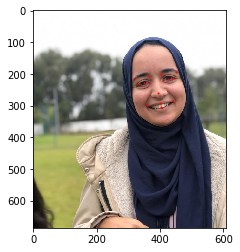

In [19]:
img = cv2.imread('img5.jpg')
default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
faces_img = np.copy(gray_img)
plt.rcParams["axes.grid"] = False

all_x_cords = []
all_y_cords = []

for i, (x,y,w,h) in enumerate(faces):
    
    h += 10
    w += 10
    x -= 5
    y -= 5
    
    just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
    cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)
    
    scale_val_x = w/96
    scale_val_y = h/96
    
    label_point = detect_points(just_face)
    all_x_cords.append((label_point[::2]*scale_val_x)+x)
    all_y_cords.append((label_point[1::2]*scale_val_y)+y)
    
plt.imshow(default_img)    
plt.plot(all_x_cords, all_y_cords, 'ro',  markersize=1)
plt.show()